### Logistic Regression with K-fold Cross Validation

In [1]:
#Importing required libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
#Loading the dataset

data = load_breast_cancer(as_frame = True)
df = data.frame
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
 
#Implementing cross validation
 
k=5
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
     
    acc = accuracy_score(y_pred , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

Avg accuracy : 0.952553951249806


In [2]:
cancer  = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [159]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [154]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
456,11.630,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,...,13.120,38.81,86.04,527.8,0.14060,0.20310,0.29230,0.06835,0.2884,0.07220
457,13.210,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.350,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
458,13.000,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,14.340,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
459,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.01043,0.1621,0.05952,...,10.670,36.92,68.03,349.9,0.11100,0.11090,0.07190,0.04866,0.2321,0.07211
460,17.080,27.15,111.20,930.9,0.09898,0.11100,0.10070,0.06431,0.1793,0.06281,...,22.960,34.49,152.10,1648.0,0.16000,0.24440,0.26390,0.15550,0.3010,0.09060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
565,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
566,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820
567,20.600,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400


In [155]:
y_test

456    1
457    1
458    1
459    1
460    0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 113, dtype: int32

In [158]:
y_pred=model.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1])

In [152]:
model.predict_proba(X_test)

array([[2.83296855e-01, 7.16703145e-01],
       [4.31149667e-02, 9.56885033e-01],
       [4.63519651e-02, 9.53648035e-01],
       [3.40229054e-02, 9.65977095e-01],
       [1.00000000e+00, 3.28523062e-12],
       [1.00000000e+00, 7.57847925e-52],
       [1.23250990e-01, 8.76749010e-01],
       [4.64489014e-03, 9.95355110e-01],
       [2.63105129e-02, 9.73689487e-01],
       [9.74081610e-01, 2.59183901e-02],
       [4.61853054e-01, 5.38146946e-01],
       [1.20975890e-02, 9.87902411e-01],
       [9.99999969e-01, 3.06267872e-08],
       [2.99680773e-02, 9.70031923e-01],
       [2.03194361e-02, 9.79680564e-01],
       [2.34486857e-01, 7.65513143e-01],
       [1.87423544e-01, 8.12576456e-01],
       [4.47390038e-02, 9.55260996e-01],
       [3.23997100e-03, 9.96760029e-01],
       [4.18318751e-03, 9.95816812e-01],
       [8.48416411e-01, 1.51583589e-01],
       [1.85849389e-02, 9.81415061e-01],
       [1.53196065e-03, 9.98468039e-01],
       [6.53442199e-01, 3.46557801e-01],
       [1.848998

In [53]:
df_feat = pd.DataFrame(data=cancer['data'], columns=cancer['feature_names'])
df_feat.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [55]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [57]:
from sklearn.model_selection import train_test_split
X = df_feat
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Logistic Regression with Cross Validation Using cross_val_score()

In [178]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import KFold

In [179]:
# with Train data only

data = load_breast_cancer(as_frame = True)
df = data.frame
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
 
model = LogisticRegression(solver= 'liblinear') # model

model.fit(X_train,y_train) # fit
y_pred = model.predict(X_test) # predict
 
result = cross_val_score(model , X_train, y_train, cv = 5) # score   
 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.954778481012658


In [180]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print('/n')
print(classification_report(y_test, y_pred))

[[ 58   8]
 [  3 102]]
/n
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        66
           1       0.93      0.97      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



C:\Users\aicyb\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


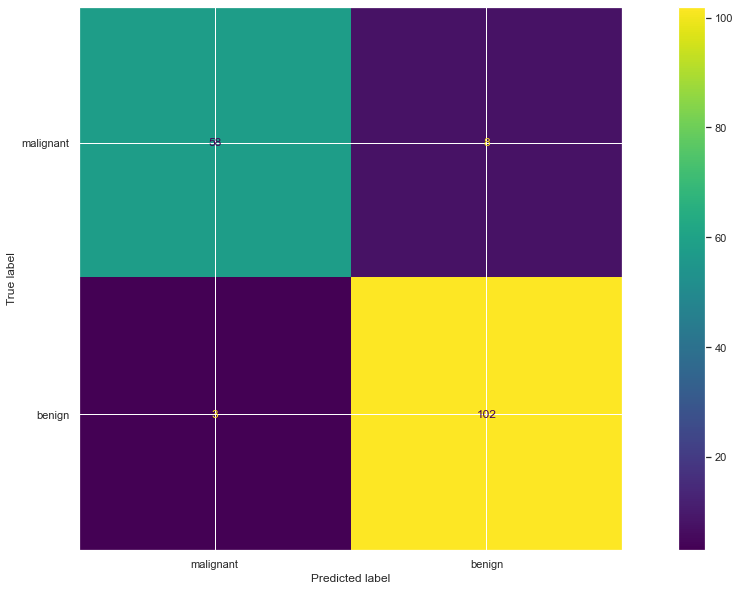

In [181]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, values_format='d', display_labels=['malignant', 'benign'])

In [ ]:
################################################################################################################################

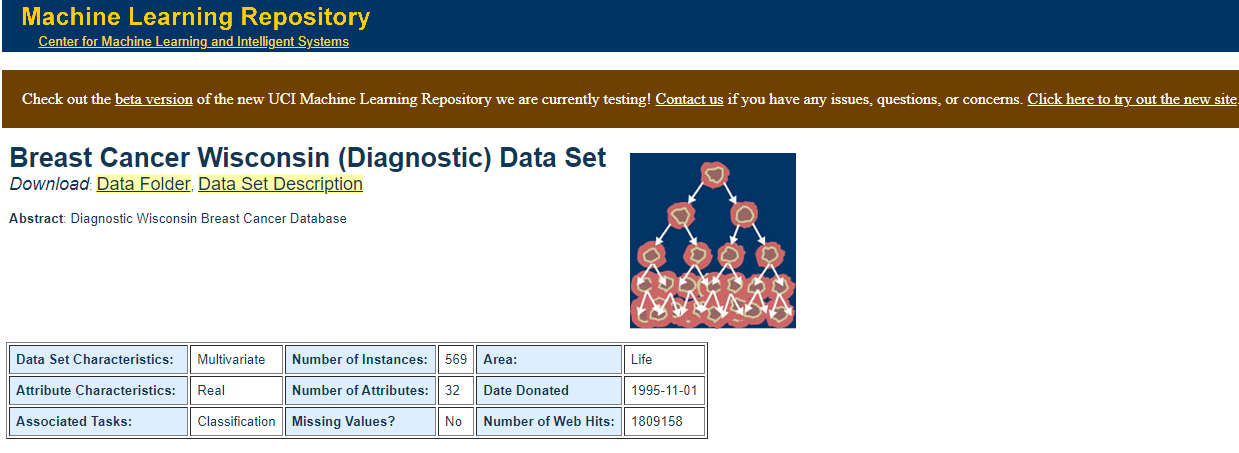

In [102]:
import pandas as pd

dataset = pd.read_csv('d:/data/breastcancerw.csv')

X = dataset.drop('diagnosis',axis=1).values
Y = dataset['diagnosis'].values

print("Cancer Data Dimensions : {}".format(dataset.shape))

Cancer Data Dimensions : (569, 32)


In [172]:
dataset.head(50)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [114]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Label Encoding


Before we can run a model, we need to make this data ready for the model. And to convert this kind of categorical text data into model-understandable numerical data, we use the Label Encoder class

In [105]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [112]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [106]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [107]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [110]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [111]:
Y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred)*100)

95.8041958041958


In [ ]:
################################################################################################################################

### SVC

In [39]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train) # Fit the model to the training data

# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,     
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',     
    max_iter=-1, probability=False, random_state=None, shrinking=True,     tol=0.001, verbose=False)

SVC()

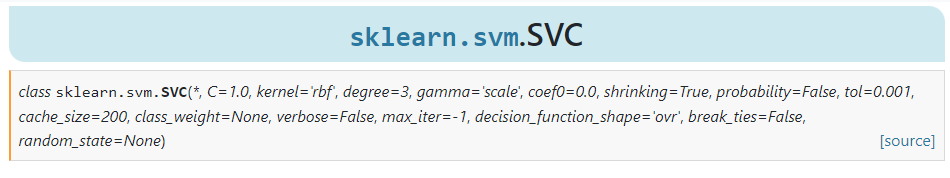

In [32]:
predictions = model.predict(X_test)

In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1, 0.01,0.001,0.0001]}
grid_model = GridSearchCV(SVC(), param_grid, verbose=3)
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.587 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.593 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.593 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.593 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.593 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.587 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.593 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.593 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.593 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.593 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.587 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 3/5] END ...................C=1000, gamma=1;, score=0.593 total time=   0.0s
[CV 4/5] END ...................C=1000, gamma=1;, score=0.593 total time=   0.0s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.593 total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.587 total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.593 total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.593 total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.593 total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.593 total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.620 total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.626 total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.582 total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.01;, score=0.593 total time=   0.0s
[CV 5/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [34]:
grid_model.best_params_

{'C': 10, 'gamma': 0.0001}

In [35]:
grid_predictions = grid_model.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))
print('/n')
print(classification_report(y_test, grid_predictions))

[[23  3]
 [ 7 80]]
/n
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        26
           1       0.96      0.92      0.94        87

    accuracy                           0.91       113
   macro avg       0.87      0.90      0.88       113
weighted avg       0.92      0.91      0.91       113



C:\Users\aicyb\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


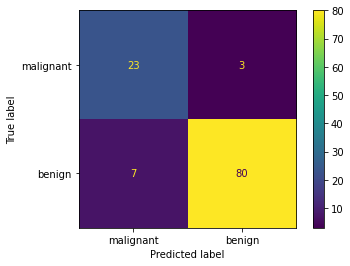

In [36]:
plot_confusion_matrix(grid_model, X_test, y_test, values_format='d', display_labels=['malignant', 'benign'])

Analyzing Confusion Matrix:

From 23 + 3= 26 people that have malignant cancer, 3 was misclassified (around 12%)

From 7+ 80= 87 people that have benign cancer, 7 was misclassified (8%)

In [117]:
################################################################################################################################

### Logistic Regression In Python

In [118]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [121]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0)

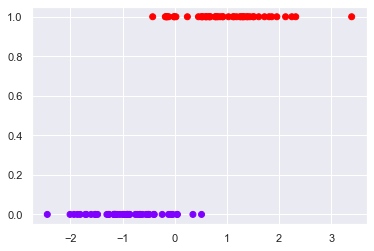

In [122]:
plt.scatter(x, y, c=y, cmap='rainbow')

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [125]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

We can access the following properties to actually view the coefficient for the slope and y-intercept of the best fitting line.

In [126]:
print(lr.coef_)
print(lr.intercept_)

[[2.69905455]]
[0.2038743]


In [128]:
# Let’s see how the model performs against data that it hasn’t been trained on.

y_pred = lr.predict(x_test)

In [130]:
confusion_matrix(y_test, y_pred)

array([[10,  1],
       [ 0, 14]], dtype=int64)

From our confusion matrix we conclude that:

True positive: 10 (We predicted a positive result and it was positive)

True negative: 14 (We predicted a negative result and it was negative)

False positive: 1 (We predicted a positive result and it was negative)

False negative: 0 (We predicted a negative result and it was positive)

If for whatever reason we’d like to check the actual probability that a data point belongs to a given class, we can use the predict_proba function.

In [133]:
lr.predict(x_test)

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1])

In [131]:
lr.predict_proba(x_test)

array([[1.40615881e-01, 8.59384119e-01],
       [2.33916351e-02, 9.76608365e-01],
       [9.88088502e-01, 1.19114976e-02],
       [1.69087013e-01, 8.30912987e-01],
       [2.97607495e-01, 7.02392505e-01],
       [6.40823198e-02, 9.35917680e-01],
       [8.60581850e-05, 9.99913942e-01],
       [9.04942531e-01, 9.50574694e-02],
       [9.87469852e-01, 1.25301478e-02],
       [9.19131086e-01, 8.08689137e-02],
       [1.04377731e-02, 9.89562227e-01],
       [4.80146292e-02, 9.51985371e-01],
       [3.83971302e-02, 9.61602870e-01],
       [2.71451310e-02, 9.72854869e-01],
       [7.01495416e-01, 2.98504584e-01],
       [3.65196784e-02, 9.63480322e-01],
       [9.61521335e-01, 3.84786650e-02],
       [9.92078121e-01, 7.92187865e-03],
       [1.20929422e-01, 8.79070578e-01],
       [2.15200681e-02, 9.78479932e-01],
       [9.80161421e-01, 1.98385790e-02],
       [1.91515049e-02, 9.80848495e-01],
       [7.81664364e-01, 2.18335636e-01],
       [7.63258076e-01, 2.36741924e-01],
       [7.768031

Before attempting to plot the Sigmoid function, we create and sort a DataFrame containing our test data.

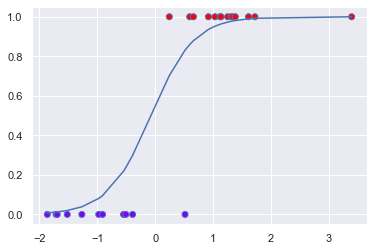

In [134]:
df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})
df = df.sort_values(by='x')
from scipy.special import expit
sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')

In [136]:
################################################################################################################################

In [142]:
import pandas as pd
import numpy as np
df = pd.read_csv('d:/data/Heart3.csv')
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [145]:
# continue ......

new_observation = [[-0.58,0.84, -1, -1]]
##### Predict class
model.predict(new_observation)
##### View predicted probabilities
model.predict_proba(new_observation)